In [1]:
import pandas as pd
from numpy import random 
import numpy as np
A = pd.DataFrame(random.randint(0, 20, (2, 2)),
columns=list('AB'))
A

,A,B
0,19,17
1,18,11


## Concat

In [12]:
def make_df(cols, ind):
    
    """This function make a simple df"""
    # list comprehension used to build dictionary
    data={c:[str(c) + str(i) for i in ind ] for c in cols}  
    return pd.DataFrame(data, ind)

In [14]:
make_df("ABC", range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [21]:
# Concatenate o numpy array
x=[1,2,3]
y=[4,5,6]
z=[7,8,9]
#axis=0
np.concatenate([x,y,z], axis=0)


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
x=[[1,2],
  [3,4]]
np.concatenate([x,x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [56]:
# Concatenate of DataFrame and Series

# Series

ser1=pd.Series(["A","B","C"], index=[1,2,3])

ser2=pd.Series(["D","E","F"], index=[4,5,6])
pd.concat([ser1,ser2], axis=1,ignore_index=True)

# DataFrame

df1=make_df("AB",[1,2])
df2=make_df("CD",[3,4])

pd.concat([df1,df2])

df3=make_df("AB",[0,1])
df4=make_df("CD",[0,1])

pd.concat([df3,df4], axis=1)

# Duplicate indices

x=make_df("AB",[0,1])
y=make_df("AB",[2,3])

pd.concat([x,y])

# Ignoring indices
pd.concat([x,y],  ignore_index=False)

#Adding MultiIndex keys

pd.concat([x,y],  keys=["x","y"])

#Concate with the join

df4=make_df("ABC",[1,2])
df5=make_df("BCD",[3,4])


pd.concat([df4,df5]) #default is join="outer"

pd.concat([df4,df5], join="inner") #inner join

pd.concat([df4,df5], join_axes=[df5.columns]) #using join_axis

# Append() Method

df1.append(df2)

,A,B,C,D
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,C3,D3
4,NaN,NaN,C4,D4


# Mergin and Join

Category of Joins:

1. one-to-one
2. many-to-one
3. many-to-many

In [61]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})

print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [63]:
df3=pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [64]:
#Many-to-one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
df4


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [66]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [71]:
# Many-to-many

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [73]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [75]:
#Specification of the Merge Key
pd.merge(df1,df2, on="employee")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [76]:
# Left_on, right_on
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df3)

pd.merge(df1,df3,left_on="employee", right_on="name")

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [79]:
# The left_index and right_index keywords
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [80]:
pd.merge(df1a, df2a, left_index=True, right_index=True) # using indices for marge

,group,hire_date
employee,,
Lisa,Engineering,2004
Bob,Accounting,2008
Jake,Engineering,2012
Sue,HR,2014


In [82]:
pd.merge(df1a, df3, left_index=True, right_on='name') # mix for join

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [86]:
# Specifying Set Arithmetic for Joins join={ineer, outer, left, right}
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])

pd.merge(df6, df7, how='inner') #default
pd.merge(df6, df7, how='outer')
pd.merge(df6, df7, how='left')
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [89]:
# Overlapping Column Names: The suffixes Keyword
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))
# we can specify suffixes key 
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Merging Dataframes


In [68]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [3]:
#add a new columns
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [4]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
#trick that we use when we want the pandas put where she think thet need to put Nana values
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [5]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [6]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [7]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [9]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [10]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [15]:
staff_df

,Location,Name,Role
0,State Street,Kelly,Director of HR
1,Washington Avenue,Sally,Course liasion
2,Washington Avenue,James,Grader


In [17]:
answer = pd.merge(products,invoices,how="outher", left_on="Product ID", right_on="Product ID")

,Location,Name,School
0,1024 Billiard Avenue,James,Business
1,Fraternity House #22,Mike,Law
2,512 Wilson Crescent,Sally,Engineering


In [18]:
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

# Idiomatic Pandas: Making Code Pandorable

In [1]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [2]:
# The way to rename columns usinq `.rename(columns={"old":"new"})`
# set_index is wery good property if we have data set with different atributes that are conected to the sigle one
# set_index is very good property if we have data set with different attributes that are connected
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [3]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County          54571                54571            54660   
        Baldwin County         182265               182265           183193   
        Barbour County          27457                27457            27341   
        Bibb County             22915                22919            22861   
        Blount County           57322                57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

### .apply()
if we want to go throught each rows

In [4]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [8]:
df.apply(min_max, axis=1);

In [6]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [90]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

Store 1   NaN
Store 1   NaN
Store 2   NaN
dtype: float64

## Aggregation and Grouping

In [3]:
import seaborn as sns

In [4]:
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
rng=np.random.RandomState(42) #generiseo random brojeve 
ser=pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [7]:
ser.sum()

2.8119254917081569

In [8]:
ser.mean()

0.56238509834163142

In [9]:
df= pd.DataFrame({"A": rng.rand(5),
                 "B":rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [12]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [14]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# Group by: Split, Apply, Combine

    
   Makes clear what the GroupBy accomplishes
   
1. The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
2. The apply step involves computing some function, usually an aggregate, transformation,
or filtering, within the individual groups.
3. The combine step merges the results of these operations into an output array.

In [16]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, 
                   columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [17]:
df.groupby("key")

In [21]:
#applay some fuction
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [5]:
planets["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [6]:
#grupiramo po jednoj koloni
planets.groupby("method") 

In [7]:
#posto ta kolona ima vise stavki mozemo izdvojiti samo jednu
planets.groupby("method")["orbital_period"]

In [8]:
#i sad na njoj raditi neku funkciju
planets.groupby("method")["orbital_period"].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [9]:
#u suprotonom nam vraca dataframe za svaku pojedinacnu metodu
planets.groupby("method").mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


#### Iteration over groups IMPORTANT

The Group by object supports direct iterationover the groups, returning each grouos as a Series or DataFrame

In [29]:
for method, group in planets.groupby("method"):
    print(f"{method}: shape = {group.shape}")

Astrometry: shape = (2, 6)
Eclipse Timing Variations: shape = (9, 6)
Imaging: shape = (38, 6)
Microlensing: shape = (23, 6)
Orbital Brightness Modulation: shape = (3, 6)
Pulsar Timing: shape = (5, 6)
Pulsation Timing Variations: shape = (1, 6)
Radial Velocity: shape = (553, 6)
Transit: shape = (397, 6)
Transit Timing Variations: shape = (4, 6)


In [24]:
from itertools import groupby
import string
import random

In [32]:
x= random.choices(string.ascii_lowercase, k=20)
x

['f',
 't',
 'u',
 's',
 'n',
 'l',
 'n',
 'm',
 'e',
 't',
 'x',
 'z',
 'r',
 'i',
 'y',
 'j',
 'd',
 's',
 'f',
 'v']

In [33]:
x.sort()
x

['d',
 'e',
 'f',
 'f',
 'i',
 'j',
 'l',
 'm',
 'n',
 'n',
 'r',
 's',
 's',
 't',
 't',
 'u',
 'v',
 'x',
 'y',
 'z']

In [34]:
groupby(x)

In [35]:
for key, group in groupby(x):
    print(f"key: {key} group {list(group)}")

key: d group ['d']
key: e group ['e']
key: f group ['f', 'f']
key: i group ['i']
key: j group ['j']
key: l group ['l']
key: m group ['m']
key: n group ['n', 'n']
key: r group ['r']
key: s group ['s', 's']
key: t group ['t', 't']
key: u group ['u']
key: v group ['v']
key: x group ['x']
key: y group ['y']
key: z group ['z']


In [38]:
for key, group in groupby(x):
    print(f"key: {key} group {len(group)}")

TypeError: object of type 'itertools._grouper' has no len()

In [19]:
data = [("11013331", "KAT"),
       ("9085267","NOT"),
       ("5238761","ETH"),
       ("11788544","NOT"),
       ("962594578","ETH"),
        ("6616351684","ETH"),
       ("5646398424","ETH"),
       ("5632362","KAT"),
       ("51313564","ETH"),
       ("3513656","ETH")]

In [20]:
df1=pd.DataFrame(data)

In [21]:
data=sorted(data,key=lambda x: x[1])

In [25]:
data

[('5238761', 'ETH'),
 ('962594578', 'ETH'),
 ('6616351684', 'ETH'),
 ('5646398424', 'ETH'),
 ('51313564', 'ETH'),
 ('3513656', 'ETH'),
 ('11013331', 'KAT'),
 ('5632362', 'KAT'),
 ('9085267', 'NOT'),
 ('11788544', 'NOT')]

In [39]:
for key, group in groupby(data,key=lambda x: x[1]):
    print(f"key: {key} group {len(group)}")
    print("\n")

TypeError: object of type 'itertools._grouper' has no len()

In [27]:
df1.columns=["first","second"]
df1

,first,second
0,11013331,KAT
1,9085267,NOT
2,5238761,ETH
3,11788544,NOT
4,962594578,ETH
5,6616351684,ETH
6,5646398424,ETH
7,5632362,KAT
8,51313564,ETH
9,3513656,ETH


In [28]:
df1.sort_values(by="second",ascending=False, inplace=True)

In [29]:
df1.groupby(by="second")

In [46]:
# when we iterate throught the groupby dataframe we put in tuple syntax (name_iterate_column, group)
# name_iterate_column- return to us all the unique name in this columns, 
# group - return several different dataframes that are build on unique key name group 
for second, group in df1.groupby(by="second"):
    print(f" second: {second} group: {type(group)}")
    

 second: ETH group: <class 'pandas.core.frame.DataFrame'>
 second: KAT group: <class 'pandas.core.frame.DataFrame'>
 second: NOT group: <class 'pandas.core.frame.DataFrame'>


In [10]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [13]:
planets.groupby("method")

In [103]:
for method, group in planets.groupby("method"):
    print(f"method: {method} {group.shape} ")

method: Astrometry (2, 6) 
method: Eclipse Timing Variations (9, 6) 
method: Imaging (38, 6) 
method: Microlensing (23, 6) 
method: Orbital Brightness Modulation (3, 6) 
method: Pulsar Timing (5, 6) 
method: Pulsation Timing Variations (1, 6) 
method: Radial Velocity (553, 6) 
method: Transit (397, 6) 
method: Transit Timing Variations (4, 6) 


In [104]:
#### Import str(len()) with groupby iterate

In [102]:
for method, group in planets.groupby("method"): #passing str(len(group)) we transform a DataFrame to somthing that we can use on function
    print(f"method: {method} {str(len(group))} ")

method: Astrometry 2 
method: Eclipse Timing Variations 9 
method: Imaging 38 
method: Microlensing 23 
method: Orbital Brightness Modulation 3 
method: Pulsar Timing 5 
method: Pulsation Timing Variations 1 
method: Radial Velocity 553 
method: Transit 397 
method: Transit Timing Variations 4 


In [52]:
planets.groupby('method')["year"].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Aggregate, filter, transform , apply

In [53]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregate 

this function allows us to use even more flexibility. It can take a string, a function or a list thereof, and computate all of them at once

In [59]:
df.groupby(by="key").agg([np.mean, "min", max])

data1         data2        
     mean min max  mean min max
key                            
A     1.5   0   3   4.0   3   5
B     2.5   1   4   3.5   0   7
C     3.5   2   5   6.0   3   9

In [60]:
# Another very usefull method is to pass a dictionary to specified on a different aggregate function on a diffrent columns

df.groupby(by="key").agg({"data1":np.max, 
                         "data2":np.min})

,data1,data2
key,,
A,3,3
B,4,0
C,5,3


### Filtering

allows as to drop data based on the group property

In [61]:
# keep all group in whitch the std id larger then some values

def fun(x):
    return x["data2"].std()>4

In [63]:
df.groupby(by="key").std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [67]:
df.groupby('key').filter(lambda x: x["data2"].std()>4)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [ ]:
lambda x: x["data"].std()>4

### Transform()

while agg must return a reduced version of the data, transform return the same data shape with some transformation like normalizing data
we will have the same shape of the data but with different numbers in it

In [76]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [83]:
df.groupby(by=["key","data1"]).sum().unstack()

data2                         
data1     0    1    2    3    4    5
key                                 
A       5.0  NaN  NaN  3.0  NaN  NaN
B       NaN  0.0  NaN  NaN  7.0  NaN
C       NaN  NaN  3.0  NaN  NaN  9.0

In [70]:
df.groupby(by="key").transform(lambda x: x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### Apply() method

this method lets us to apply arbitrary function ti the group results. The function should use  DataFrame and return eather a pandas object(DataFrame, Series) or a scalar

In [73]:
def norm_by_data2(x):
    x["data1"]/=x["data2"].sum()
    return x

In [84]:
df.groupby(by="key").apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


# Multiple group by

In [86]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C',"A"],
'data1': [0,1,2,3,4,5,3],
'data2': rng.randint(0, 10, 7)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
6,A,3,3


In [87]:
df.groupby(["key","data1"]).sum()

data2
key data1       
A   0          5
    3          6
B   1          0
    4          7
C   2          3
    5          9

# Group by

In [96]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [53]:
#

In [106]:
df.head()
df = df.set_index('STNAME')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

#for group, frame in 
df.groupby(by="STNAME").agg(fun)
#print('There are ' + str(len(frame)) + ' records in group ' +str(group) + ' for processing')


In [40]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [16]:
#.agg or aggregate() is method to the coluns or columns of data in the group and return the results
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head(3)

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667


In [15]:
# group by on df and series
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [46]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum})).head() # if we put multyple functio agg return multiple columns

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956


In [48]:
# pandas recognize that we want to use the both function on the both columns and return dataFrame
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum})).head()

avg                             sum                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama       71420.313433    71658.328358         4785161         4801108
Alaska        24621.413793    24921.379310          714021          722720
Arizona      427213.866667   431248.800000         6408208         6468732
Arkansas      38965.253333    39180.506667         2922394         2938538
California   643691.017241   650000.586207        37334079        37700034

In [50]:
#and is this cell we give the pandas what we wanted to do on the first and on the second coluimns
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})).head()

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034


# Scales

In [51]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
print(df)

def fun(a,b):
  return a*b

df.groupby("Category").agg(lambda df,a,b: sum(df[a]*df[b]))

In [ ]:
df['Grades'].astype('category').head()

In [ ]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

In [ ]:
grades > 'C'

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

# Pivot Tables

In [1]:
import pandas as pd
import numpy as np
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [2]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [3]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [5]:


Bikes.pivot_table(values="Price",columns="Bike Type",index='Manufacturer' ,agg=np.mean)

NameError: name 'Bikes' is not defined

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# Date Functionality in Pandas

In [10]:
import pandas as pd
import numpy as np

### Timestamp

In [11]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [12]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [13]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [14]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [15]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [16]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [17]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [18]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,42,75
"Aug 29, 2014",80,68
2015-06-26,82,64
7/12/16,18,89


In [19]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,42,75
2014-08-29,80,68
2015-06-26,82,64
2016-07-12,18,89


In [20]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [21]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [22]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [24]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

##### cumsum()

In [26]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,95,116
2016-10-16,91,122
2016-10-30,88,123
2016-11-13,86,119
2016-11-27,95,117
2016-12-11,101,120
2016-12-25,99,119
2017-01-08,99,115
2017-01-22,98,126


In [29]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

### diff()

In [28]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-4.0,6.0
2016-10-30,-3.0,1.0
2016-11-13,-2.0,-4.0
2016-11-27,9.0,-2.0
2016-12-11,6.0,3.0
2016-12-25,-2.0,-1.0
2017-01-08,0.0,-4.0
2017-01-22,-1.0,11.0


In [19]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,124.666667
2016-11-30,115.5,126.000000
2016-12-31,107.0,123.500000
2017-01-31,103.0,124.000000


In [20]:
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [21]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [30]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,101,120
2016-12-25,99,119
2017-01-08,99,115
2017-01-22,98,126


In [31]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,95,116
2016-10-09,95,116
2016-10-16,91,122
2016-10-23,91,122
2016-10-30,88,123
2016-11-06,88,123
2016-11-13,86,119
2016-11-20,86,119
2016-11-27,95,117
2016-12-04,95,117


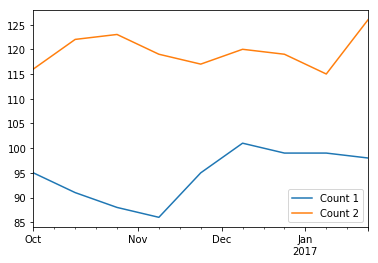

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()